# Assignment 1: Benchmarking Neural Nets with the XOR Problem

### DS 6050 - School of Data Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For deliverables, you must write code in Python/Pytorch and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 80 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_1_ann.ipynb**.

Updated: 02/04/2025 by Sheng Li.



In [ ]:
# You might want to use the following packages
import numpy as np
import os
import torch
print(torch.__version__)
import torch.nn.functional as F
import torch.nn as nn

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

2.5.1+cpu


---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the `train / validate / test` sets. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


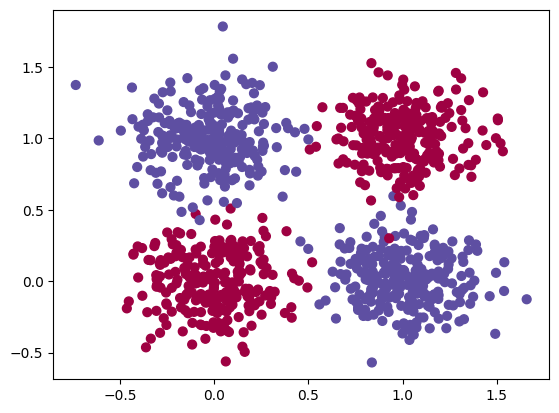

In [ ]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [ ]:
class net(nn.Module):
  # Your code here!
  # TODO: implement a customized module using establised functions from pytorch
  # Loss can be calculated with nn.CrossEntropyLoss()
  # Linear layer could be added to the model with nn.linear()
  # Hyperbolic tangent can be achieved with torch.tanh()
  # Use any optimizer to optimize model parameters
  # An example can be found at: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

  def __init__(self):
    super(net, self).__init__()
    self.l1 = nn.Linear(2, 64)
    self.l2 = nn.Linear(64, 64)
    self.l3 = nn.Linear(64, 2)

  def forward(self, x):
    # x = torch.tanh(self.l1(x))
    # x = torch.tanh(self.l2(x))
    x = F.relu(self.l1(x))
    x = F.relu(self.l2(x))
    x = self.l3(x)
    return x

  def fit(self, X, y, epochs, X_val, Y_val):
    optimizer = torch.optim.SGD(self.parameters(), lr=0.1)
    loss_fn = nn.CrossEntropyLoss()
    y = torch.tensor(y, dtype=torch.long)
    X = torch.tensor(X, dtype=torch.float32)

    for epoch in range(epochs):
      optimizer.zero_grad()
      y_pred = self.forward(X)
      loss = loss_fn(y_pred, y)
      loss.backward()
      optimizer.step()

      if epoch % 10 == 0:
        print(f'Epoch {epoch} - Loss: {loss.item()}')

In [ ]:
my_net = net()
my_net.fit(X_train, y_train, 1000, X_val, y_val)

Epoch 0 - Loss: 0.7009500861167908
Epoch 10 - Loss: 0.6623668670654297
Epoch 20 - Loss: 0.6292353868484497
Epoch 30 - Loss: 0.5896984338760376
Epoch 40 - Loss: 0.5391835570335388
Epoch 50 - Loss: 0.4766942858695984
Epoch 60 - Loss: 0.4058030843734741
Epoch 70 - Loss: 0.33403944969177246
Epoch 80 - Loss: 0.27032890915870667
Epoch 90 - Loss: 0.21880874037742615
Epoch 100 - Loss: 0.17943783104419708
Epoch 110 - Loss: 0.15008778870105743
Epoch 120 - Loss: 0.12825529277324677
Epoch 130 - Loss: 0.11181855946779251
Epoch 140 - Loss: 0.09920765459537506
Epoch 150 - Loss: 0.08936630934476852
Epoch 160 - Loss: 0.08154192566871643
Epoch 170 - Loss: 0.07520772516727448
Epoch 180 - Loss: 0.07002420723438263
Epoch 190 - Loss: 0.0657154843211174
Epoch 200 - Loss: 0.06208738312125206
Epoch 210 - Loss: 0.05899602547287941
Epoch 220 - Loss: 0.05633021518588066
Epoch 230 - Loss: 0.05401524901390076
Epoch 240 - Loss: 0.05198575183749199
Epoch 250 - Loss: 0.05019218102097511
Epoch 260 - Loss: 0.04859089478

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.normal(0, 0.01, (n1, n0))
        self.b1 = np.random.normal(0, 0.01, (n1, 1))
        self.W2 = np.random.normal(0, 0.01, (n2, n1))
        self.b2 = np.random.normal(0, 0.01, (n2, 1))

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse_output=False)

    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer
        # and softmax for the output layer

        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0, keepdims=True)

        return A1, A2


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """


        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        L = -np.sum(Y * np.log(A2 + 1e-9)) / y.shape[0]  # Adding small epsilon to avoid log(0)


        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        # feel free to cross check the calculated gradients with autograd from Pytorch
        # Ref document: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
        m   = y.shape[0]

        dZ2 = A2 - self.one_hot(y)
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply(np.dot(self.W2.T, dZ2), 1-np.power(A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.

        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):

            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)

            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent
            self.W1 = self.W1 - self.alpha * dW1
            self.b1 = self.b1 - self.alpha * db1
            self.W2 = self.W2 - self.alpha * dW2
            self.b2 = self.b2 - self.alpha * db2

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f"
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, Y_val), self.evaluate(X_val,Y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T

        # SUBTASK 5: Implement the prediction process.
        # Hint: It should include a forward pass, and then use the class with higher probability.
        _, A2 = self.forward_pass(X)
        y_hat = np.argmax(A2, axis=0)

        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version.

Epoch 0/1000 - loss: 0.692864 - accuracy: 0.513889 - val_loss: 0.695545 - val_accuracy: 0.412500
Epoch 10/1000 - loss: 0.692756 - accuracy: 0.513889 - val_loss: 0.698233 - val_accuracy: 0.412500
Epoch 20/1000 - loss: 0.692755 - accuracy: 0.513889 - val_loss: 0.698391 - val_accuracy: 0.412500
Epoch 30/1000 - loss: 0.692753 - accuracy: 0.513889 - val_loss: 0.698402 - val_accuracy: 0.412500
Epoch 40/1000 - loss: 0.692751 - accuracy: 0.513889 - val_loss: 0.698404 - val_accuracy: 0.412500
Epoch 50/1000 - loss: 0.692748 - accuracy: 0.513889 - val_loss: 0.698406 - val_accuracy: 0.412500
Epoch 60/1000 - loss: 0.692745 - accuracy: 0.513889 - val_loss: 0.698409 - val_accuracy: 0.412500
Epoch 70/1000 - loss: 0.692741 - accuracy: 0.513889 - val_loss: 0.698413 - val_accuracy: 0.412500
Epoch 80/1000 - loss: 0.692736 - accuracy: 0.513889 - val_loss: 0.698418 - val_accuracy: 0.412500
Epoch 90/1000 - loss: 0.692730 - accuracy: 0.513889 - val_loss: 0.698423 - val_accuracy: 0.412500
Epoch 100/1000 - loss

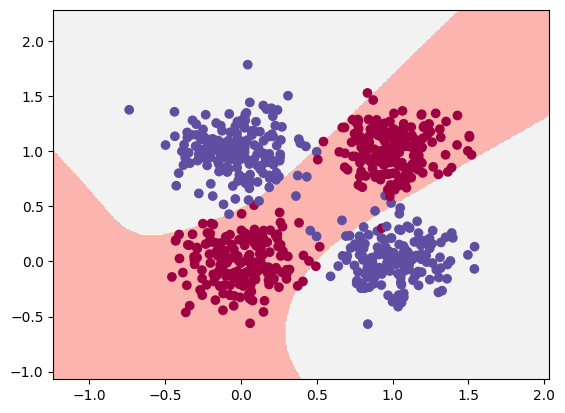

In [ ]:
# MODEL 1 here
n0 = 2 # input layer dimensionality
n1 = 4 # hiden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.5 # learning rate for gradient descent
epochs = 1000 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


Epoch 0/1000 - loss: 0.693122 - accuracy: 0.518056 - val_loss: 0.693244 - val_accuracy: 0.412500
Epoch 10/1000 - loss: 0.692741 - accuracy: 0.513889 - val_loss: 0.698114 - val_accuracy: 0.412500
Epoch 20/1000 - loss: 0.692728 - accuracy: 0.513889 - val_loss: 0.698414 - val_accuracy: 0.412500
Epoch 30/1000 - loss: 0.692715 - accuracy: 0.513889 - val_loss: 0.698444 - val_accuracy: 0.412500
Epoch 40/1000 - loss: 0.692701 - accuracy: 0.513889 - val_loss: 0.698460 - val_accuracy: 0.412500
Epoch 50/1000 - loss: 0.692684 - accuracy: 0.513889 - val_loss: 0.698479 - val_accuracy: 0.412500
Epoch 60/1000 - loss: 0.692663 - accuracy: 0.513889 - val_loss: 0.698501 - val_accuracy: 0.412500
Epoch 70/1000 - loss: 0.692639 - accuracy: 0.513889 - val_loss: 0.698527 - val_accuracy: 0.412500
Epoch 80/1000 - loss: 0.692611 - accuracy: 0.513889 - val_loss: 0.698559 - val_accuracy: 0.412500
Epoch 90/1000 - loss: 0.692577 - accuracy: 0.513889 - val_loss: 0.698598 - val_accuracy: 0.412500
Epoch 100/1000 - loss

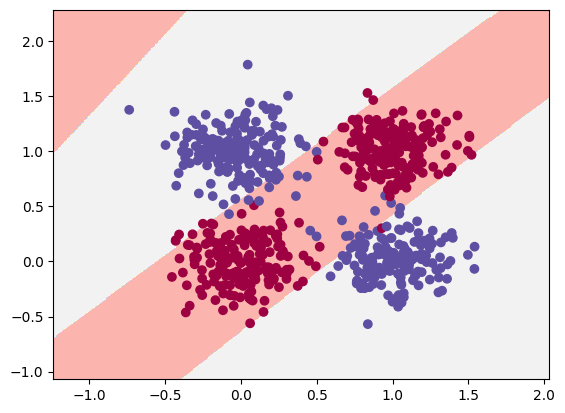

In [ ]:
# MODEL 2 here
n0 = 2 # input layer dimensionality
n1 = 32 # hiden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.5 # learning rate for gradient descent
epochs = 1000 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


Epoch 0/1000 - loss: 0.692995 - accuracy: 0.513889 - val_loss: 0.694025 - val_accuracy: 0.412500
Epoch 10/1000 - loss: 0.692708 - accuracy: 0.513889 - val_loss: 0.698192 - val_accuracy: 0.412500
Epoch 20/1000 - loss: 0.692680 - accuracy: 0.513889 - val_loss: 0.698457 - val_accuracy: 0.412500
Epoch 30/1000 - loss: 0.692651 - accuracy: 0.513889 - val_loss: 0.698502 - val_accuracy: 0.412500
Epoch 40/1000 - loss: 0.692617 - accuracy: 0.513889 - val_loss: 0.698541 - val_accuracy: 0.412500
Epoch 50/1000 - loss: 0.692578 - accuracy: 0.513889 - val_loss: 0.698584 - val_accuracy: 0.412500
Epoch 60/1000 - loss: 0.692534 - accuracy: 0.513889 - val_loss: 0.698637 - val_accuracy: 0.412500
Epoch 70/1000 - loss: 0.692483 - accuracy: 0.513889 - val_loss: 0.698699 - val_accuracy: 0.412500
Epoch 80/1000 - loss: 0.692425 - accuracy: 0.513889 - val_loss: 0.698774 - val_accuracy: 0.412500
Epoch 90/1000 - loss: 0.692358 - accuracy: 0.513889 - val_loss: 0.698863 - val_accuracy: 0.412500
Epoch 100/1000 - loss

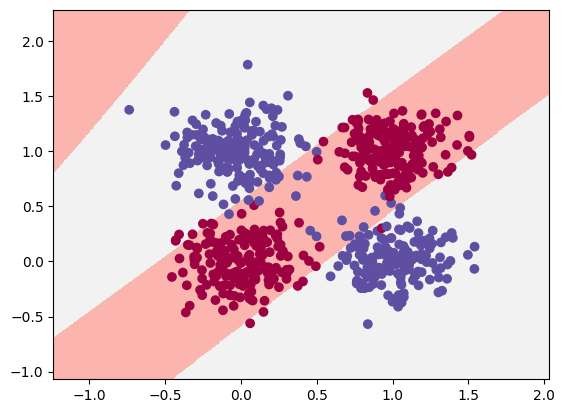

In [ ]:
# MODEL 3 here
n0 = 2 # input layer dimensionality
n1 = 64 # hiden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.5 # learning rate for gradient descent
epochs = 1000 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

In [ ]:
# COMPARISONS OF THESE MODELS WITH THE STANDARD LIBRARY MODEL IN TASK 2


## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

With the homebrewed implementation, I found that I could choose a larger learning rate without a performance decrease in my implementation, while the library implementation started overshooting and loss would increase again (maybe this would benefit from early stopping?). There was also a performance decrease after increasing the dimensionality of the hidden layer. The best performance that I saw was with a small dimension layer (4 neurons) and a moderately large learning rate of 0.5. On the other hand, the library implementation seemed to only get better with an increase in neurons. Perhaps this has something to do with how the learning rate affects the traversal - I had to use a smaller learning rate to ensure that it would converge.
Overall I found it fun and interesting to try and implement this class myself. I feel as though I understand more about how the architecture works. Even if I do not choose to continue this approach in the future, this implementation has given me a more thorough grasp of the concepts that are often abstracted away in black-box programming.

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lecture slides on Module 2.
 * Post a question in Piazza.
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <vga8uf@virginia.edu> with subject starting "DS 6050 Assignment 1:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!